In [4]:
from slither import Slither

# Disable SSL certificate verification
# Create a Slither instance assuming the smart contract code is verified on Etherscan

sl = Slither('0xdac17f958d2ee523a2206206994597c13d831ec7')


In [ ]:
from utils import *

In [211]:
import sqlite3
import pandas as pd
connection = sqlite3.connect('contracts_found.db')

# SQL query
query = "SELECT * FROM contracts_found"

# Reading the SQL query into a DataFrame
contracts_found_ = pd.read_sql_query(query, connection)
print(len(contracts_found_))


340


In [73]:
for i in range(len(contracts_found)):
    if contracts_found.loc[i, 'success'] ==1:
        continue
    if 'Unknown language: unknown' in str(contracts_found.loc[i, 'error']):
        continue
        
    import time
    time.sleep(3)
    try:
                
        contract_address = contracts_found['Contract'][i]
        print(contract_address)
        sl = Slither(contract_address)
        contracts_found.loc[i, 'success'] = 1
        print(1)
    except Exception as e:
        print(e)
        
        contracts_found.loc[i, 'success'] = 0
        contracts_found.loc[i, 'error'] = e

0xfe9E45b7085eEb64D95903d3972c3712Af510d35
1
0x9C9747FCC731f8B665BeC6f0467C88604d671Ac9
1


In [221]:
verified_contracts = contracts_found[contracts_found['success'] ==1].reset_index(drop=True)
verified_contracts

,Unnamed: 0.1,Unnamed: 0,index,Name,Ticker,Contract,success,error
0,1,1,1,Pepewifhat,PWIF,0x216463D71EAA305872fB97FBd40559CaEce39749,1.0,NaN
1,8,8,10,PepeTrump,PepeTrump,0xa5f6182455A381ddcfc2eaF3984EfeEB95017627,1.0,Invalid compilation: \nEtherscan API rate limi...
2,9,9,11,KANSHA,KSH,0x625933f04eb04f33Ac489c952854165C7cc4A2fd,1.0,Invalid compilation: \nEtherscan API rate limi...
3,10,10,12,Miltzn Home,MH,0xb8D44feCbAC44eA6Ea25D5480e0a902548870ed1,1.0,Invalid compilation: \nEtherscan API rate limi...
4,19,19,21,KUMATAMA Only One Collection,koc,0x1EB3Add1D2B0B047766b6978303Be52F60bec2f9,1.0,NaN
5,23,23,25,Galaxy,GALAXY,0x5aA4597457D9DEB68274c51b80C7862E094fb169,1.0,NaN
6,24,24,27,Avalon AI,AVA,0x41EbBaDCA18B831167A9E7c2044d2fF804644435,1.0,NaN
7,25,25,28,MindTheGap $BTC,MTG,0xDe82d78d284543454a39137092D79BaC8A6341A9,1.0,NaN
8,26,26,29,SpreadTheWord $BTC,STW,0xf5B8e90eBF2DD22B7d8460E0DD09ae14526d1011,1.0,NaN
9,27,27,30,Battle Derby Pass,bdp,0x1e1c7987582D2BCE3E910bbe0A487fCbFB755d37,1.0,NaN


In [85]:
contracts_found[contracts_found.error.astype(str) !='Unknown language: unknown'].success.value_counts()

success
0.0    18
1.0    15
Name: count, dtype: int64

In [33]:
compilation_unit = sl.compilation_units[0]
# Print all the contracts from the USDT address
print([str(c) for c in compilation_unit.contracts])
# Print the most derived contracts from the USDT address
print([str(c) for c in compilation_unit.contracts_derived])

['IERC20', 'Context', 'Ownable', 'SafeMath', 'BaseToken', 'StandardToken']
['SafeMath', 'StandardToken']


In [ ]:
compilation_unit = sl.compilation_units[0]
# Print all the contracts from the USDT address
print([str(c) for c in compilation_unit.contracts])
# Print the most derived contracts from the USDT address
print([str(c) for c in compilation_unit.contracts_derived])

In [219]:
contracts_found = pd.read_csv("contracts slither check.csv")

In [224]:

get_monthly_prices_for_a_token("0xDe82d78d284543454a39137092D79BaC8A6341A9".lower())

{'data': {'ethereum': {'dexTrades': None}}, 'errors': [{'message': 'Failed to find token 0xde82d78d284543454a39137092d79bac8a6341a9 in Ethereum Mainnet', 'locations': [{'line': 4, 'column': 13}], 'path': ['ethereum', 'dexTrades'], 'error_type': 'client', 'query_id': 'iXHzVvNu34oRHGxq'}]}


<Response [200]>

In [225]:
import numpy as np
verified_contracts['max_price_in_eth'] =np.nan
for i in range(len(verified_contracts)):
    if pd.notnull(verified_contracts.loc[i, 'max_price_in_eth']):
        continue

    token_contract_address_token = verified_contracts['Contract'].values[i]

    response = get_monthly_prices_for_a_token(token_contract_address_token)
    
    try:
        if len(response.json()['data']['ethereum']['dexTrades']) == 0:
            max_price_in_eth = 0
        else:
            max_price_in_eth = response.json()['data']['ethereum']['dexTrades'][0]['maximum_price']

    except:
        print('error getting prices for', token_contract_address_token)
        # this seems to happen infrequently for some tokens that didnt make it to a pool
        # Example: https://etherscan.io/token/0xDe82d78d284543454a39137092D79BaC8A6341A9
        max_price_in_eth = 0

    try:
        token_supply = get_supply(token_contract_address_token)
    except:
        token_supply = 0

    max_market_cap_in_eth = token_supply*max_price_in_eth
    
    verified_contracts.loc[i, 'max_price_in_eth'] = max_price_in_eth
    verified_contracts.loc[i, 'token_supply'] = token_supply
    verified_contracts.loc[i, 'max_market_cap_in_eth'] = max_market_cap_in_eth
    print(token_contract_address_token, max_price_in_eth, token_supply, max_market_cap_in_eth)

{'data': {'ethereum': {'dexTrades': []}}}
0x216463D71EAA305872fB97FBd40559CaEce39749 0 0 0
{'data': {'ethereum': {'dexTrades': [{'timeInterval': {'month': '2024-03-01'}, 'buyCurrency': {'symbol': 'PepeTrump', 'address': '0xa5f6182455a381ddcfc2eaf3984efeeb95017627'}, 'buyAmount': 854239873926.3235, 'sellCurrency': {'symbol': 'WETH', 'address': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'}, 'sellAmount': 4.798477786990575, 'trades': 101, 'maximum_price': 1.2223440476219541e-11, 'minimum_price': 1.7366297818969466e-12, 'open_price': '1.1151459093540261e-11', 'close_price': '1.7718921622970446e-12'}]}}}
Total Supply: 1000000000000.0
0xa5f6182455A381ddcfc2eaF3984EfeEB95017627 1.2223440476219541e-11 1000000000000.0 12.22344047621954
{'data': {'ethereum': {'dexTrades': [{'timeInterval': {'month': '2024-03-01'}, 'buyCurrency': {'symbol': 'KSH', 'address': '0x625933f04eb04f33ac489c952854165c7cc4a2fd'}, 'buyAmount': 151751794.0579154, 'sellCurrency': {'symbol': 'WETH', 'address': '0xc02aaa39b223

In [229]:
verified_contracts

,Unnamed: 0.1,Unnamed: 0,index,Name,Ticker,Contract,success,error,max_price_in_eth,token_supply,max_market_cap_in_eth
0,1,1,1,Pepewifhat,PWIF,0x216463D71EAA305872fB97FBd40559CaEce39749,1.0,NaN,0.000000e+00,0.000000e+00,0.000000e+00
1,8,8,10,PepeTrump,PepeTrump,0xa5f6182455A381ddcfc2eaF3984EfeEB95017627,1.0,Invalid compilation: \nEtherscan API rate limi...,1.222344e-11,1.000000e+12,1.222344e+01
2,9,9,11,KANSHA,KSH,0x625933f04eb04f33Ac489c952854165C7cc4A2fd,1.0,Invalid compilation: \nEtherscan API rate limi...,4.023572e-07,1.000000e+09,4.023572e+02
3,10,10,12,Miltzn Home,MH,0xb8D44feCbAC44eA6Ea25D5480e0a902548870ed1,1.0,Invalid compilation: \nEtherscan API rate limi...,0.000000e+00,0.000000e+00,0.000000e+00
4,19,19,21,KUMATAMA Only One Collection,koc,0x1EB3Add1D2B0B047766b6978303Be52F60bec2f9,1.0,NaN,0.000000e+00,0.000000e+00,0.000000e+00
5,23,23,25,Galaxy,GALAXY,0x5aA4597457D9DEB68274c51b80C7862E094fb169,1.0,NaN,8.944098e-07,1.000000e-02,8.944098e-09
6,24,24,27,Avalon AI,AVA,0x41EbBaDCA18B831167A9E7c2044d2fF804644435,1.0,NaN,1.098210e-06,1.000000e+08,1.098210e+02
7,25,25,28,MindTheGap $BTC,MTG,0xDe82d78d284543454a39137092D79BaC8A6341A9,1.0,NaN,0.000000e+00,0.000000e+00,0.000000e+00
8,26,26,29,SpreadTheWord $BTC,STW,0xf5B8e90eBF2DD22B7d8460E0DD09ae14526d1011,1.0,NaN,0.000000e+00,0.000000e+00,0.000000e+00
9,27,27,30,Battle Derby Pass,bdp,0x1e1c7987582D2BCE3E910bbe0A487fCbFB755d37,1.0,NaN,0.000000e+00,7.770000e-16,0.000000e+00


<Axes: >

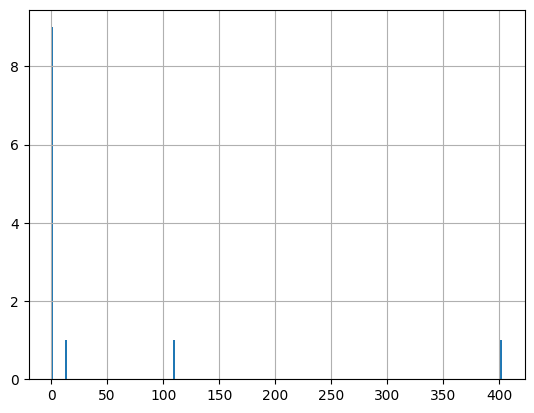

In [228]:
verified_contracts.max_market_cap_in_eth.hist(bins=200)